In [1]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import numpy as np
import pandas as pd

In [2]:
# create the data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

In [5]:
# use the nearest neighbor graph as our adjacency matrix
A = kneighbors_graph(X, n_neighbors=5).toarray()
pd.DataFrame(A).head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# create the graph laplacian
D = np.diag(A.sum(axis=1))
L = D-A

In [7]:
# find the eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

In [8]:
# use Fiedler value to find best cut to separate data
clusters = vecs[:,1] > 0

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


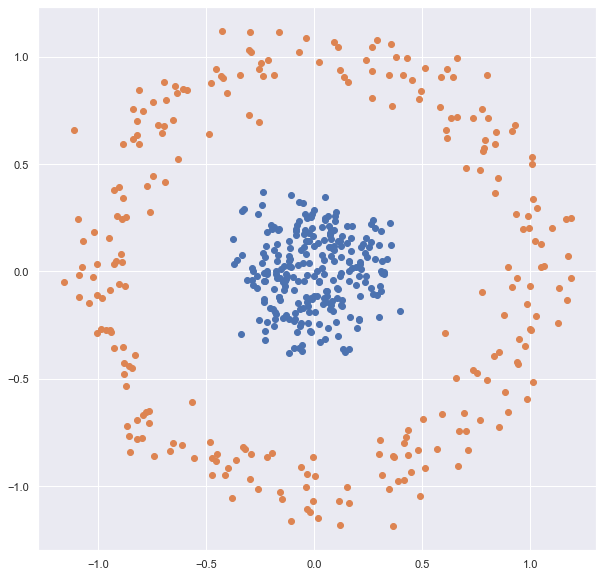

In [18]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

plt.scatter(X[clusters,0],X[clusters,1])
plt.scatter(X[~clusters,0],X[~clusters,1])